[1 0]
1    14599
0     5012
Name: Malware, dtype: int64
              precision    recall  f1-score   support

     Benigns       0.99      0.96      0.97      1479
    Malwares       0.99      1.00      0.99      4405

    accuracy                           0.99      5884
   macro avg       0.99      0.98      0.98      5884
weighted avg       0.99      0.99      0.99      5884



Text(95.72222222222221, 0.5, 'Truth')

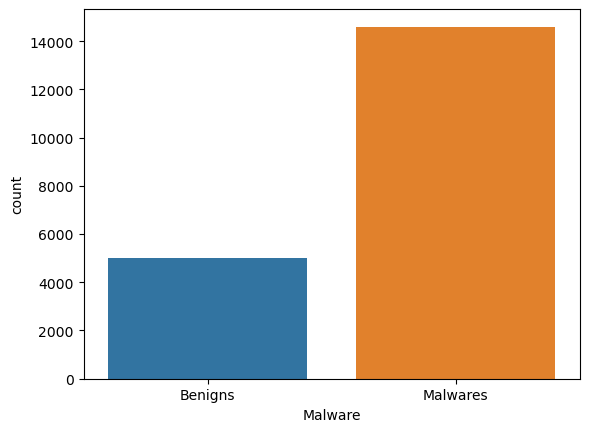

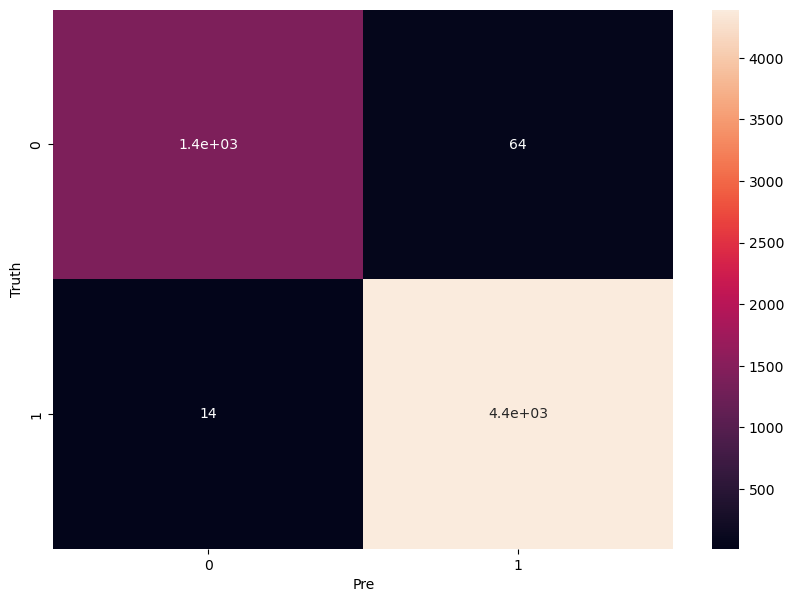

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

data1 = pd.read_csv('dataset_malwares.csv')
#print(data1['TimeDateStamp'])
#print(data1.isnull().sum())
#print(data1.info())
y = data1['Malware']
print(y.unique())
data1 = data1.drop(['Machine', 'TimeDateStamp', 'Name', 'Malware'], axis = 1) #Malware= label
data1.head()
'''-----------------------------------------------------------------------------------'''
ace = sns.countplot(x=y)
ace.set_xticklabels(['Benigns', 'Malwares'])
print(y.value_counts())
'''-----------------------------------------------------------------------------------'''
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size = 0.3, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
dtree = RandomForestClassifier()
dtree.fit(x_train, y_train)
'''-----------------------------------------------------------------------------------'''
y_pred = dtree.predict(x_test)
print(classification_report(y_test, y_pred, target_names = ['Benigns', 'Malwares']))
'''-----------------------------------------------------------------------------------'''
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

#bieu do de hieu confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cf, annot = True)
plt.xlabel('Pre')
plt.ylabel('Truth')